# Chapter 10

Today we look at Mayo's recent discussion {cite}`Mayo2018-qa` of a proposal by Kass {cite}`Kass2011-yj` about how to reconcile the classical and Bayesian approaches. 

Kass's suggestion is as follows:

> The commonality between frequentist and Bayesian inferences is the use of theoretical assumptions, together with a *subjunctive* statement. In both approaches a statistical model is introduced—in the Bayesian case the prior distributions become part of what I am here calling the model—and we may say that the inference is based on what *would* happen if the data *were* to be random variables distributed according to the statistical model. This modeling assumption would be reasonable if the model *were* to describe accurately the variation in the data ( {cite}`Kass2011-yj` pp. 4-5)

As we will see, Mayo rejects this both for her own way of thinking about the classical school, and she further thinks that the more austere Bayesian would reject it as well.

In addition to being an important recent discussion, going through this debate will help us see better the differences between the classical and Bayesian school.

## A classical inference

### A classical inference with low probability of type I error

In [124]:
import numpy as np
import pandas as pd
from scipy.stats import binom, norm
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt   
import metakernel
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets    
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
from shapely.geometry import LineString

In [125]:
def normalvisual(mu, var, n):

    varavg = var / n  # variance of the average

    # standard deviation of the average

    sigma = np.sqrt(var)
    sigmaavg = np.sqrt(varavg)

    # Create a range
    x = np.linspace(0, 15, 10000)
    l = arr = np.full(len(x), .05)

    # Create the normal distribution for the range
    y = norm.pdf(x, mu, sigma)
    yavg = norm.pdf(x, mu, sigmaavg)
    tavg = 1-norm.cdf(mu+x, mu, sigmaavg)+norm.cdf(mu-x, mu, sigmaavg)

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the normal distribution on the left subplot
    axs[0].plot(x, yavg)
    axs[1].plot(x, tavg)
    axs[0].set_xlim(9, 15)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)    
    axs[1].plot(x, l, label='.05', color='r')


    # Plot the histogram on the right subplot
    # axs[1].hist(data, bins=30, density=True, alpha=0.6, color='g')

    # Set titles
    axs[0].set_title('pdf of X̅_{%i}~N(%1.1f, %1.3f)' % (n, mu, varavg))
    axs[1].set_title('probability of |X̅_{%i}-%1.1f|≥c, \n as function of c, \n (aka probability of Type I error \n as function of c)' % (n, mu))
    axs[1].set_xlabel('c')  # Add x-axis label

    first_line = LineString(np.column_stack((x, tavg)))
    second_line = LineString(np.column_stack((x, l)))
    intersection = first_line.intersection(second_line)

    # ... existing code ...

    intersection = first_line.intersection(second_line)

    axs[1].axvline(x=intersection.x, color='g', label='%1.2f' % intersection.x)
    axs[1].legend()
    

    plt.show()

### Recalling a hypothesis test from the classical school

We are repeatedly and independently measure $X_1, \ldots, X_n$ which we assume to be normally distributed with common unknown mean and known variance. For the sake of concreteness, suppose that the variance is 1.

We want to know the value of $\mu$ such that $X_1, \ldots, X_n\sim N(\mu,1)$.

That is, we imagine we already know that the variance is 1, but we want to know where the center of the bell shape is.

We formulate the hypothesis that the center is at $\mu_0$:

- The null hypothesis $H_0$: $\hspace{5mm}$ $\mu=\mu_0$

- The alternative hypothesis $H_1$: $\hspace{5mm}$ $\mu \neq \mu_0$. 

We choose a comparatively large value $c>0$, and we adopt the following test:

- Test: reject $H_0$ if $T_n \geq c$.

where $T_n =\left|\overline{X}_n - \mu_0\right|$ and $\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$ is the average

If $c$ is large and the null hypothesis is true, then the event $T_n\geq c$ has small probability and thus the Type I error is low. 

In the special case of normals with fixed variance and fixed $n$, the probability of the Type I error is constant across all choices of the null hypothesis, as the following examples illustrate.

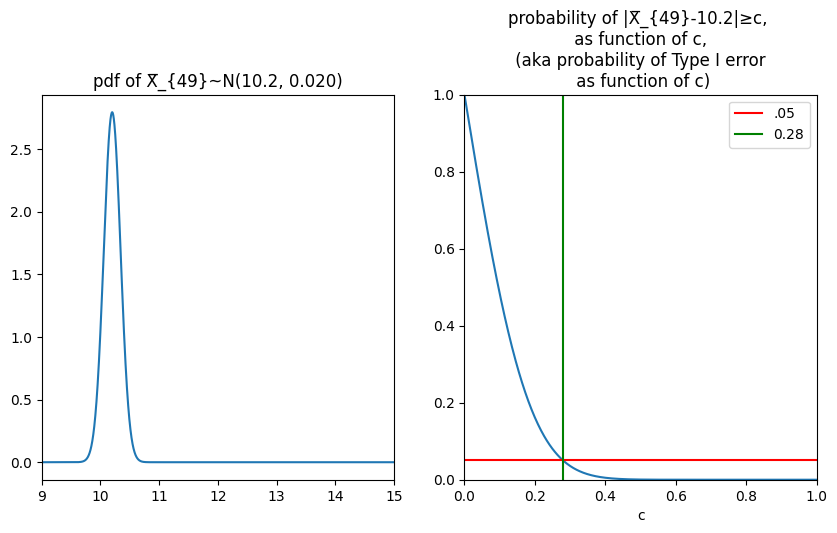

In [126]:
normalvisual(10.2, 1, 49)

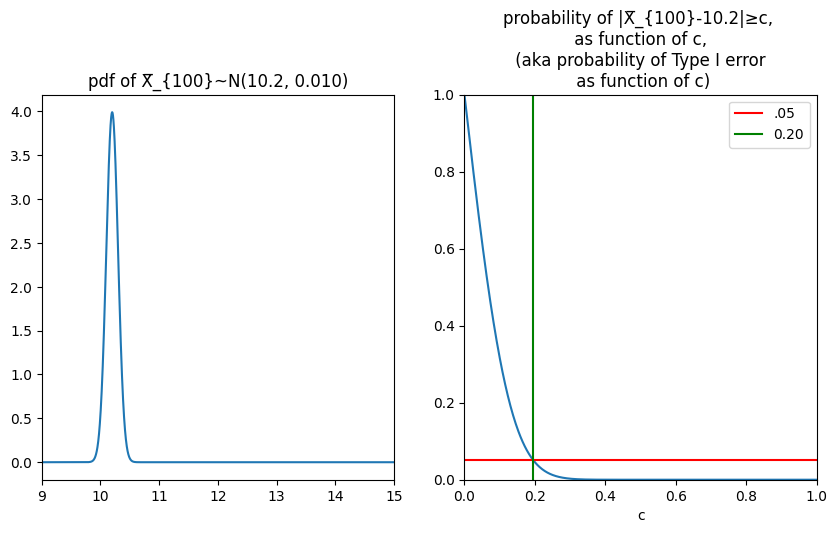

In [127]:
normalvisual(10.2, 1, 100)

For later reference, we record some values, where the value of $c$ is the smallest value such that the probability of a type I error in the test "reject $H_0$ if $T_n\geq c$" is $\leq .05$:

|  | variance | $n$ | $c$ |
|----------|----------|----------|----------|
| Example 1   | 1   | 49   | .28   |
| Example 2  |  1  | 100   | .20   |
| Example 3  |  4 | 100  | .40  |
| Example 4  | 4  | 49  | .56  |

### Recasting this classical inference as a confidence interval

Suppose that we choose $c$ optimally, right where the type I probability of the event $T_n\geq c$ falls below $.05$. In the above examples, it is $c=.28$.

Hence one has the probability of the event $T_n<c$ is above $.95$.

But one has $T_n<c$ 

iff $-c<\mu_0-\overline{X}_n<c$ 
     
iff $\overline{X}_n-c<\mu_0<\overline{X}_n+c$.

Hence the probability that " '$\pm$ c of the average' contains the null hypothesis" is above $.95$. 

And this holds regardless of what the null hypothesis is.

We recopy our table, noting now that $c$ is the smallest value such that the probability that $\overline{X}_n-c<\mu_0<\overline{X}_n+c$ is above $.95$.

|  | variance | $n$ | $c$ |
|----------|----------|----------|----------|
| Example 1   | 1   | 49   | .28   |
| Example 2  |  1  | 100   | .20   |
| Example 3  |  4 | 100  | .40  |
| Example 4  | 4  | 49  | .56  |


## Kass and Mayo on this classical inference

Kass {cite}`Kass2011-yj` describes how the classical school would view this inference:

> *Frequentist interpretation of the confidence interval.* Under the assumptions above, if we were to draw infinitely many random samples from a $N(\mu_0,1)$ distribution, 95% of the corresponding confidence intervals $(\overline{X}_{49}-.28, \overline{X}_{49}+.28)$ would cover $\mu_0$ ({cite}`Kass2011-yj` p. 4, notation changed to match preceeding discussion)

Kass contrast this to his preferred 'pragmatist' approach:

> *Pragmatist interpretation of the confidence interval.* If we were to draw a random sample according to the assumptions above, the resulting confidence interval $(\overline{X}_{49}-.28, \overline{X}_{49}+.28)$ would have probability 0.95 of covering $\mu_0$. Because the random sample lives in the theoretical world, this is a theoretical statement. Nonetheless, substituting $\overline{X}_{49}=10.2$, we obtain the interval $(10.2-.28, 10.2+.28)$, and are able to draw useful conclusions as long as our theoretical world is aligned well with the real world that produced the data ({cite}`Kass2011-yj` p. 4, notation changed to match preceeding discussion)

Mayo critizes Kass' pragmatist approach and offers her own way of thinking about the confidence interval:

> Everything is left in the subjunctive conditional: if the 'theoretical world is aligned well with the real world that produced the data' then such and such follows. [P] Would the frequentist [...] be content with this? The frequentist error statistican would not, because there's no detachment of an inference ({cite}`Mayo2018-qa` pp. 426-427)

I take it that she means that Kass' pragmatist hasn't given us an independent reason to think that the  theoretical world is aligned well with the real world, and that it is part of the task of statistical inference to help us towards that knowledge. 

Here is Mayo's own view about how to think about the confidence intervals:

> Kass' 0.95 interval estimate is $(9.92, 10.48)$ [coming from $(10.2-.28, 10.2+.28)$]. There's a good indication that $\mu_0>9.92$ because if $\mu$ were 9.92 (or lower), we very frequently would have gotten a smaller value of $\overline{X}_n$ than we did. [...] What would occur in hypothetical repetitions, under various claims about parameters, is not for future assurance in using the rule, but ot understand what caused the events on which this inference is based. If a method is incapable of reflecting changes in the data-generating source, its inferences are criticized on grounds of severity. ({cite}`Mayo2018-qa` p. 429)

### Last word on confidence intervals

Recall again that the classical theorist chooses the value $c$ in her test so that, regardless of what the null hypothesis $\mu_0$ is, 

the probability that " '$\pm$ c of the average' contains $\mu_0$" is above $.95$. 

However, note that in the probability statement, $\mu_0$ is fixed and not variable. 

The Bayesian has a way of seeing these confidence intervals as genuine statements about the probability of the parameter being in a certain interval.

## A Bayesian inference

### The components of Bayes' Theorem

Bayes' Theorem takes the following form in the context of statistical inference:

$$p(\theta \mid x) = \frac{p(x\mid \theta)\cdot p(\theta)}{p(x)}$$

which as per usual you remember in the mnemonic:

$$\mathrm{posterior} = \frac{\mathrm{likelihood}\times \mathrm{prior}}{\mathrm{evidence}}$$

Here is a compact summary of the components: 

| concept | notation | definition | how to find value |
|----------|----------|----------|----------|
| prior   | $p(\theta)$   |  prior degree of belief that $X\sim p_{\theta}$  | initially, consult your degrees of belief, which might be recorded in frequency information which you accept; after the initial round, the prior is the previous round's posterior |
| likelihood   | $p(x\mid \theta)$   | probability that $X=x$ conditional on $X\sim p_{\theta}$     | $p_{\theta}(x)$, i.e. input in $x$ to pdf $p_{\theta}$; look at graph or consult computer or book; if in applied context look at "if $\theta$ were ... then $x$ would be ..." statements salient in the subject matter |
| evidence (aka marginal, aka prior predictive distribution)  | $p(x)$  | probability that $X=x$  | use formula $p(x)=\sum_{\theta\in \Theta} p(\theta)\cdot p(x\mid \theta)$; in non-trivial cases use computer  |
| posterior  | $p(\theta \mid x)$  | probability that $X\sim p_{\theta}$ conditional on $X=x$  | Use Bayes' Theorem and three previous rows  |


### Visualizing Bayes' Theorem with uniform prior

Here is a familiar example of Bayes' Theorem:

1. The parameter space is small, with each pdf in it being represented by a solid line in the graph to the top left. In this case, the pdfs are some normals. 

2. We have a uniform prior represented by the pie chart to the bottom left.

3. Using Bayes' Theorem we can calculate $p(\theta\mid x)$ for all values of $\theta,x$: the different values of $\theta$ correspond to the different solid lines on the top right, and the different values of $x$ are on the bottom right. 

4. If observe a value of $x$ and look at the values right above it-- where the colored lines intersect the black vertical line-- we get the posterior $p(\theta\mid x)$. These add up to one and we can represent them in the pie chart to the bottom left.

In [128]:
# size_sample_space, size_parameter_space are positive integers
# prior is list of length size_parameter_space of non-negative numbers that sum to 1
# likelihood is a list of length size_parameter_space 
# where each element is a list of length size_sample_space numbers that sum to 1

def bayes(size_sample_space,size_parameter_space,prior,likelihood, observed_value = None, round_digits = 4):

    if not 0.98 <= sum(prior) <= 1.02:
        raise ValueError("The sum of the prior probabilities must be equal to 1")
    if len(prior) != size_parameter_space:
        raise ValueError("The length of the prior probabilities must be equal to the size of the parameter space")
    if len(likelihood) != size_parameter_space:
        raise ValueError("The length of the likelihood must be equal to the size of the parameter space")
    if any([len(likelihood[i]) != size_sample_space for i in range(size_parameter_space)]):
        raise ValueError("The length of each entry in the likelihood must be equal to the size of the sample space")
  

    sample_space = list(range(size_sample_space))

    parameter_space = list(range(size_parameter_space))

    labels = ['θ_'+str(i) for i in range(size_parameter_space)]  

    parameter_space_names = []

    for i in parameter_space:
        parameter_space_names.append(f"likelihood p(x_j  &#124; θ_{i})")

    evidence =  []

    for j in sample_space:
        evidence.append(sum([prior[i]*likelihood[i][j] for i in parameter_space]))

    sample_space_names = []

    for j in sample_space:
        sample_space_names.append(f"x_{j}, evidence = {evidence[j].round(round_digits)}")


    posterior = [[None]*size_sample_space for _ in range(size_parameter_space)]

    for i in parameter_space:
        for j in sample_space:
            posterior[i][j] = ((likelihood[i][j]*prior[i]) / evidence[j])

    fig, axs = plt.subplots(2, 2, figsize=(10, 5))  # 2 row, 2 columns




    for i in parameter_space:
        if i == 0:
            axs[0,0].plot(sample_space, likelihood[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,0].plot(sample_space, likelihood[i])
            else:
                axs[0,0].plot(sample_space, likelihood[i], label='θ_%i' % i)
    axs[0,0].plot(sample_space, evidence, '--', label='evidence', color = 'black')        
    axs[0,0].set_ylim(0, max(max(likelihood[0]), max(likelihood[1]))+.001)
    axs[0,0].set_title('likelihood p(x | θ)')
    axs[0,0].set_xlabel('x')
    axs[0,0].set_ylim(0, 1.1)
    axs[0,0].legend(loc='upper right')    

    for i in parameter_space:
        if i == 0:
            axs[0,1].plot(sample_space, posterior[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,1].plot(sample_space, posterior[i])
            else:
                axs[0,1].plot(sample_space, posterior[i], label='θ_%i' % i)
    if observed_value is not None:
        axs[0,1].axvline(x=observed_value, linestyle='--', color = 'black', label='observed value')       
    axs[0,1].set_ylim(0, 1.1)
    axs[0,1].set_title('posterior p(θ  | x)')
    axs[0,1].set_xlabel('x')
    axs[0,1].legend(loc='upper right') 

    fig.subplots_adjust(top=.8)

    fig.subplots_adjust(hspace=1)

    fig.suptitle('insert')

    sorted_prior_indices = np.argsort(prior)
    above_02_indices_prior = [i for i in sorted_prior_indices if prior[i] > 0.04]
    labels_prior = [labels[i] if i in above_02_indices_prior else '' for i in range(size_parameter_space)]

    axs[1,0].pie(prior, labels=labels_prior)
    axs[1,0].set_title('prior p(θ) uniform')



    evidence_observed = sum([prior[i]*likelihood[i][observed_value] for i in range(size_parameter_space)])

    posterior_observed = [prior[i]*likelihood[i][observed_value]/evidence_observed for i in range(size_parameter_space)]

    sorted_posterior_indices = np.argsort(posterior_observed)
    above_02_indices_posterior = [i for i in sorted_posterior_indices if posterior_observed[i] > 0.04]
    labels_posterior = [labels[i] if i in above_02_indices_posterior else '' for i in range(size_parameter_space)]


    axs[1,1].pie(posterior_observed, labels=labels_posterior)    
    axs[1,1].set_title('posterior p(θ| %1.2f) non-uniform' % observed_value)

    fig.subplots_adjust(top=.8)

    fig.suptitle('Visualizing Bayes\' Theorem with uniform prior')


    return posterior


In [129]:
def bayes_many_normals(size_sample_space,size_parameter_space, observed_value = None):

    n = size_sample_space
    
    l = size_parameter_space
    
    my_prior = [1/l] * l

    my_mean = [l//2 + .5*(l//2 - k) for k in range(l)]

    my_var = [1] * l

    my_likelihood = [None]*l    

    std_dev = [None]*l

    my_min= [None]*l

    my_max= [None]*l

    for i in range(l):
        std_dev[i] = np.sqrt(my_var[i])

    my_min = min([my_mean[i] - 3*std_dev[i] for i in range(l)])
    my_max = max([my_mean[i] + 3*std_dev[i] for i in range(l)])

    my_sample_space_alt = np.linspace(my_min, my_max, size_sample_space)

    for i in range(l):
        my_likelihood[i] = norm.pdf(my_sample_space_alt, my_mean[i], std_dev[i])


    bayes(n,l,my_prior,my_likelihood, observed_value = observed_value)
    

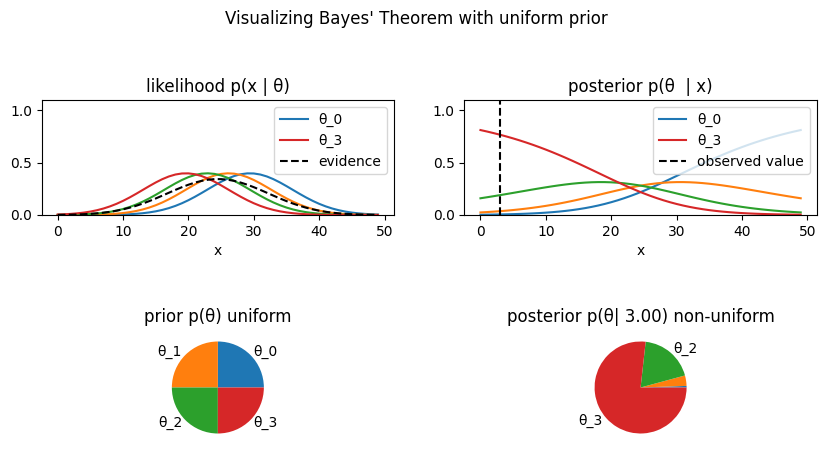

In [130]:
bayes_many_normals(50,4,3)



### Visualizing Bayes' Theorem Better with uniform prior

The pie charts are helpful for certain things-- one can e.g. quickly look at them and see how the posterior is non-uniform. 

We can also represent it as a histogram, i.e. by lining up $\theta_0, \theta_1, \ldots$ on $x$-axis and by plotting the values of $p(\theta_0), p(\theta_1), \ldots$.

In [131]:
# size_sample_space, size_parameter_space are positive integers
# prior is list of length size_parameter_space of non-negative numbers that sum to 1
# likelihood is a list of length size_parameter_space 
# where each element is a list of length size_sample_space numbers that sum to 1

def bayes_better(size_sample_space,size_parameter_space,prior,likelihood, observed_value = None, round_digits = 4):

    if not 0.98 <= sum(prior) <= 1.02:
        raise ValueError("The sum of the prior probabilities must be equal to 1")
    if len(prior) != size_parameter_space:
        raise ValueError("The length of the prior probabilities must be equal to the size of the parameter space")
    if len(likelihood) != size_parameter_space:
        raise ValueError("The length of the likelihood must be equal to the size of the parameter space")
    if any([len(likelihood[i]) != size_sample_space for i in range(size_parameter_space)]):
        raise ValueError("The length of each entry in the likelihood must be equal to the size of the sample space")
  

    sample_space = list(range(size_sample_space))

    parameter_space = list(range(size_parameter_space))

    labels = ['θ_'+str(i) for i in range(size_parameter_space)]  

    parameter_space_names = []

    for i in parameter_space:
        parameter_space_names.append(f"likelihood p(x_j  &#124; θ_{i})")

    evidence =  []

    for j in sample_space:
        evidence.append(sum([prior[i]*likelihood[i][j] for i in parameter_space]))

    sample_space_names = []

    for j in sample_space:
        sample_space_names.append(f"x_{j}, evidence = {evidence[j].round(round_digits)}")


    posterior = [[None]*size_sample_space for _ in range(size_parameter_space)]

    for i in parameter_space:
        for j in sample_space:
            posterior[i][j] = ((likelihood[i][j]*prior[i]) / evidence[j])

    fig, axs = plt.subplots(2, 2, figsize=(10, 5))  # 2 row, 2 columns




    for i in parameter_space:
        if i == 0:
            axs[0,0].plot(sample_space, likelihood[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,0].plot(sample_space, likelihood[i])
            else:
                axs[0,0].plot(sample_space, likelihood[i], label='θ_%i' % i)
    axs[0,0].plot(sample_space, evidence, '--', label='evidence', color = 'black')        
    axs[0,0].set_ylim(0, max(max(likelihood[0]), max(likelihood[1]))+.001)
    axs[0,0].set_title('likelihood p(x | θ)')
    axs[0,0].set_xlabel('x')
    axs[0,0].set_ylim(0, 1.1)
    axs[0,0].legend(loc='upper right')    

    for i in parameter_space:
        if i == 0:
            axs[0,1].plot(sample_space, posterior[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,1].plot(sample_space, posterior[i])
            else:
                axs[0,1].plot(sample_space, posterior[i], label='θ_%i' % i)
    if observed_value is not None:
        axs[0,1].axvline(x=observed_value, linestyle='--', color = 'black', label='observed value')       
    axs[0,1].set_ylim(0, 1.1)
    axs[0,1].set_title('posterior p(θ  | x)')
    axs[0,1].set_xlabel('x')
    axs[0,1].legend(loc='upper right') 

    fig.subplots_adjust(top=.8)

    fig.subplots_adjust(hspace=1)

    sorted_prior_indices = np.argsort(prior)
    above_02_indices_prior = [i for i in sorted_prior_indices if prior[i] > 0.04]
    labels_prior = [labels[i] if i in above_02_indices_prior else '' for i in range(size_parameter_space)]

    axs[1,0].plot(parameter_space, prior, color='fuchsia')
    axs[1,0].set_title('prior p(θ) uniform')
    axs[1,0].set_xlabel('θ')    

    evidence_observed = sum([prior[i]*likelihood[i][observed_value] for i in range(size_parameter_space)])

    posterior_observed = [prior[i]*likelihood[i][observed_value]/evidence_observed for i in range(size_parameter_space)]

    axs[1,1].plot(parameter_space, posterior_observed, color='fuchsia')
    axs[1,1].set_title('posterior p(θ  | %1.2f) non-uniform' % observed_value)
    axs[1,1].set_xlabel('θ')   

    fig.subplots_adjust(top=.8)

    fig.suptitle('Visualizing Bayes\' Theorem Better with uniform prior')




    return posterior


In [132]:
def bayes_many_normals_better(size_sample_space,size_parameter_space, observed_value = None):

    n = size_sample_space
    
    l = size_parameter_space
    
    my_prior = [1/l] * l

    my_mean = [l//2 + .5*(l//2 - k) for k in range(l)]

    my_var = [1] * l

    my_likelihood = [None]*l    

    std_dev = [None]*l

    my_min= [None]*l

    my_max= [None]*l

    for i in range(l):
        std_dev[i] = np.sqrt(my_var[i])

    my_min = min([my_mean[i] - 3*std_dev[i] for i in range(l)])
    my_max = max([my_mean[i] + 3*std_dev[i] for i in range(l)])

    my_sample_space_alt = np.linspace(my_min, my_max, size_sample_space)

    for i in range(l):
        my_likelihood[i] = norm.pdf(my_sample_space_alt, my_mean[i], std_dev[i])


    bayes_better(n,l,my_prior,my_likelihood, observed_value = observed_value)
    

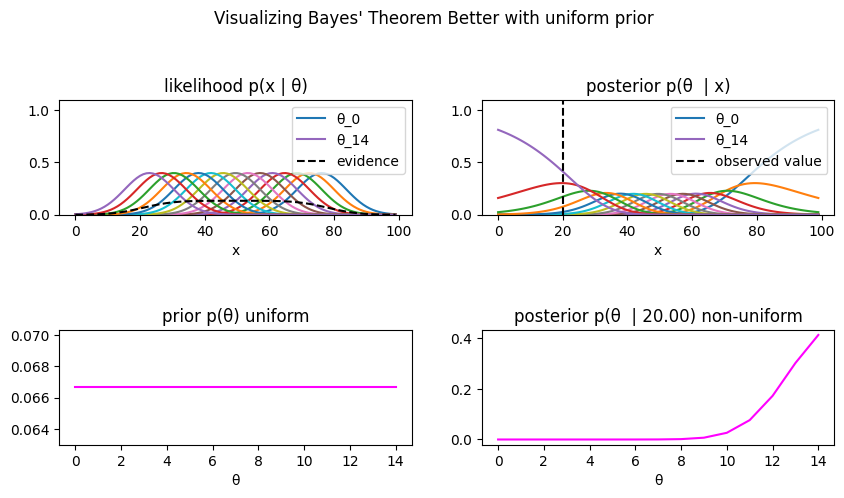

In [133]:
bayes_many_normals_better(100, 15, 20)

### When visualizing Bayes' Theorem with binomial prior, one sees that the posterior is also bell-shaped

In [134]:
# size_sample_space, size_parameter_space are positive integers
# prior is list of length size_parameter_space of non-negative numbers that sum to 1
# likelihood is a list of length size_parameter_space 
# where each element is a list of length size_sample_space numbers that sum to 1

def bayes_better_binom(size_sample_space,size_parameter_space,prior,likelihood, q, observed_value = None, round_digits = 4):

    if not 0.98 <= sum(prior) <= 1.02:
        raise ValueError("The sum of the prior probabilities must be equal to 1")
    if len(prior) != size_parameter_space:
        raise ValueError("The length of the prior probabilities must be equal to the size of the parameter space")
    if len(likelihood) != size_parameter_space:
        raise ValueError("The length of the likelihood must be equal to the size of the parameter space")
    if any([len(likelihood[i]) != size_sample_space for i in range(size_parameter_space)]):
        raise ValueError("The length of each entry in the likelihood must be equal to the size of the sample space")
  

    sample_space = list(range(size_sample_space))

    parameter_space = list(range(size_parameter_space))

    labels = ['θ_'+str(i) for i in range(size_parameter_space)]  

    parameter_space_names = []

    for i in parameter_space:
        parameter_space_names.append(f"likelihood p(x_j  &#124; θ_{i})")

    evidence =  []

    for j in sample_space:
        evidence.append(sum([prior[i]*likelihood[i][j] for i in parameter_space]))

    sample_space_names = []

    for j in sample_space:
        sample_space_names.append(f"x_{j}, evidence = {evidence[j].round(round_digits)}")


    posterior = [[None]*size_sample_space for _ in range(size_parameter_space)]

    for i in parameter_space:
        for j in sample_space:
            posterior[i][j] = ((likelihood[i][j]*prior[i]) / evidence[j])

    fig, axs = plt.subplots(2, 2, figsize=(10, 5))  # 2 row, 2 columns




    for i in parameter_space:
        if i == 0:
            axs[0,0].plot(sample_space, likelihood[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,0].plot(sample_space, likelihood[i])
            else:
                axs[0,0].plot(sample_space, likelihood[i], label='θ_%i' % i)
    axs[0,0].plot(sample_space, evidence, '--', label='evidence', color = 'black')        
    axs[0,0].set_ylim(0, max(max(likelihood[0]), max(likelihood[1]))+.001)
    axs[0,0].set_title('likelihood p(x | θ)')
    axs[0,0].set_xlabel('x')
    axs[0,0].set_ylim(0, 1.1)
    axs[0,0].legend(loc='upper right')    
    
    for i in parameter_space:
        if i == 0:
            axs[0,1].plot(sample_space, posterior[i], label='θ_0')
        else:
            if i<size_parameter_space-1:
                axs[0,1].plot(sample_space, posterior[i])
            else:
                axs[0,1].plot(sample_space, posterior[i], label='θ_%i' % i)
    if observed_value is not None:
        axs[0,1].axvline(x=observed_value, linestyle='--', color = 'black', label='observed value')       
    axs[0,1].set_ylim(0, 1.1)
    axs[0,1].set_title('posterior p(θ  | x)')
    axs[0,1].set_xlabel('x')
    axs[0,1].legend(loc='upper right') 

    fig.subplots_adjust(top=.8)

    fig.subplots_adjust(hspace=1)

    sorted_prior_indices = np.argsort(prior)
    above_02_indices_prior = [i for i in sorted_prior_indices if prior[i] > 0.04]
    labels_prior = [labels[i] if i in above_02_indices_prior else '' for i in range(size_parameter_space)]

    axs[1,0].plot(parameter_space, prior, color='fuchsia')
    axs[1,0].set_title('prior Binomial(%i,%1.2f)' % (size_parameter_space,q))
    axs[1,0].set_xlabel('θ')    
    axs[1,0].set_ylim(0, .4)    

    evidence_observed = sum([prior[i]*likelihood[i][observed_value] for i in range(size_parameter_space)])

    posterior_observed = [prior[i]*likelihood[i][observed_value]/evidence_observed for i in range(size_parameter_space)]

    axs[1,1].plot(parameter_space, posterior_observed, color='fuchsia')
    axs[1,1].set_title('posterior p(θ  | %1.2f), also near bell-shaped' % observed_value)
    axs[1,1].set_xlabel('θ')   
    axs[1,1].set_ylim(0, .4)        

    fig.subplots_adjust(top=.8)

    fig.suptitle('Visualizing Bayes\' Theorem Better with binomial prior')




    return posterior


In [135]:
def bayes_many_normals_better_binom(size_sample_space,size_parameter_space, q, observed_value = None):

    n = size_sample_space
    
    l = size_parameter_space
    
    my_prior = binom.pmf(range(l), l-1, q)

    my_mean = [l//2 + .5*(l//2 - k) for k in range(l)]

    my_var = [1] * l

    my_likelihood = [None]*l    

    std_dev = [None]*l

    my_min= [None]*l

    my_max= [None]*l

    for i in range(l):
        std_dev[i] = np.sqrt(my_var[i])

    my_min = min([my_mean[i] - 3*std_dev[i] for i in range(l)])
    my_max = max([my_mean[i] + 3*std_dev[i] for i in range(l)])

    my_sample_space_alt = np.linspace(my_min, my_max, size_sample_space)

    for i in range(l):
        my_likelihood[i] = norm.pdf(my_sample_space_alt, my_mean[i], std_dev[i])


    bayes_better_binom(n,l,my_prior,my_likelihood, q, observed_value = observed_value)
    

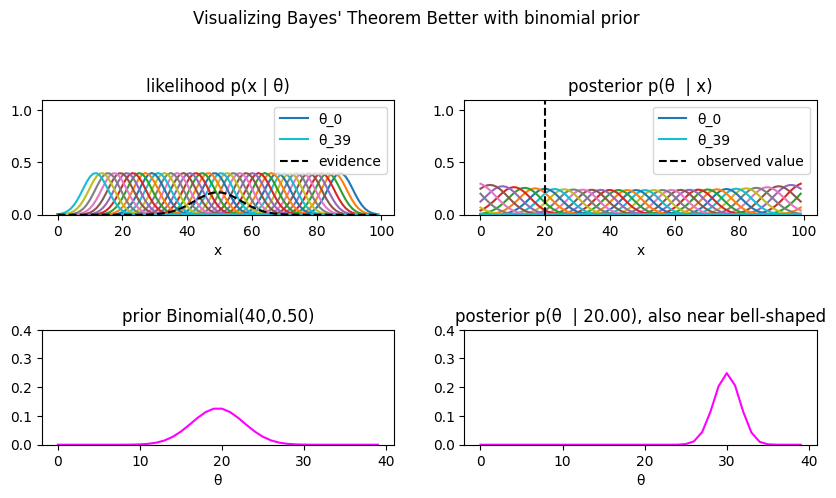

In [136]:
bayes_many_normals_better_binom(100, 40, 0.5, 20)



## Normals with normal prior

In [137]:
def posterior_parameters(σ2,a,b2,n,X̅):

    σ = np.sqrt(σ2)

    b = np.sqrt(b2)

    se = σ/np.sqrt(n)

    w = (1/se**2)/((1/se**2)+(1/b**2))

    θ̅ = w*X̅ + (1-w)*a

    τ = np.sqrt(1/(1/se**2 + (1/b**2)))

    return θ̅, τ

In [138]:
interact(posterior_parameters, 
         σ2=FloatSlider(min=0.1, max=10, step=0.1, value=1), 
         a=FloatSlider(min=0, max=20, step=0.1, value=0), 
         b2=FloatSlider(min=0, max=100000000000, step=0.1, value=1000000), 
         n=FloatSlider(min=1, max=100, step=0.1, value=49), 
         X̅=FloatSlider(min=0, max=20, step=0.1, value=10.2))

interactive(children=(FloatSlider(value=1.0, description='σ2', max=10.0, min=0.1), FloatSlider(value=0.0, desc…

<function __main__.posterior_parameters(σ2, a, b2, n, X̅)>

In [139]:
def posterior_plot(σ2,a,b2,n,X̅,c,k):

    σ = np.sqrt(σ2)

    b = np.sqrt(b2)

    y = np.zeros((k,1000))

    θ = np.random.normal(a, b, k)




    # Generate points on the x axis between -10 and 10:
    x = np.linspace(-20, 20, 1000)

    for i in range(k):
        y[i] = norm.pdf(x, θ[i],σ)
    
    fig, axs = plt.subplots(3, 2, figsize=(10, 5))  # 1 row, 1 columns

    # Calculate the PDF of the normal distribution at these points:
    for i in range(k):
        axs[0,0].plot(x, y[i]) 
    axs[0,0].set_xlim(-5, 5)
 

    axs[1,0].plot(x, norm.pdf(x, a, b))
    axs[1,0].set_title('prior N(%1.2f,%1.2f)' % (a,b2))
    axs[1,0].set_ylim(0, 1)        




    fig.subplots_adjust(top=.8)

    fig.subplots_adjust(hspace=1)


    θ̅, τ = posterior_parameters(σ2,a,b2,n,X̅)

    z = norm.pdf(x, θ̅, τ)
    
    axs[1,1].plot(x,z)
    axs[1,1].set_xlim(9, 15)
    axs[1,1].axvline(x=θ̅, color='b', linestyle='--', label='%1.2f' % θ̅)  # Add a vertical line at x=10
    axs[1,1].set_title('posterior p(θ|X̅_%i)' % n)
    axs[1,1].legend()  # Add the legend    

    axs[2,1].plot(x,z)
    axs[2,1].set_xlim(9, 15)
    axs[2,1].set_title('posterior p(θ|X̅_%i)' % n)    


    a = X̅-c
    b = X̅+c

    def f(x):
        return norm.pdf(x, θ̅, τ)

    integral, error = quad(f, a, b)

    z1 = [z[i] if (a < x[i] and x[i] < b) else 0 for i in range(len(x))]
    axs[2,1].plot(x,z1, alpha=0.1)
    axs[2,1].fill_between(x, z1, color='green', alpha=0.25, label = 'Pr(X̅_%i-%1.2f<θ<X̅_%i+%1.2f) \n = %1.2f' % (n,c, n,c,integral))  # Fill the area under the curve
    axs[2,1].legend()  # Add the legend



    # Set titles
#    axs[0].set_title('likelihood p(x|θ_1),...,p(x|θ_%i) \n θ_1,..., θ_%i ~N(%1.2f, %1.2f)' % (k, k, a, b2))
#    axs[1].set_title('with X̅=%1.2f, \n posterior p(θ|X̅)~N(%1.2f, %1.2f)' % (X̅, θ̅, τ))

    
    plt.show()



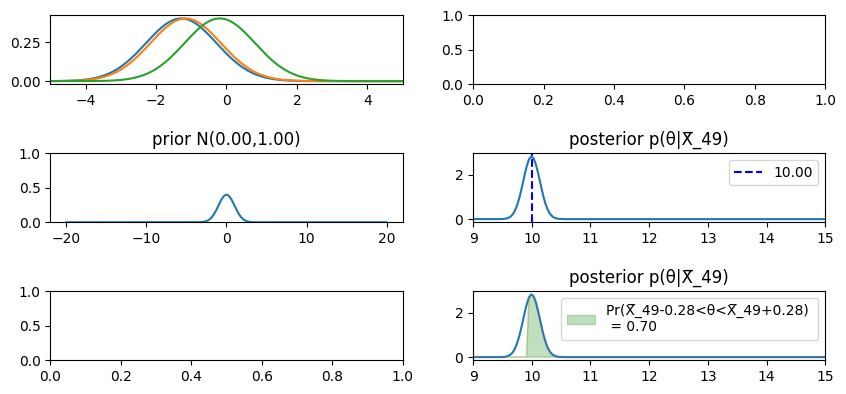

In [140]:
posterior_plot(1,0,1,49,10.2,.28,3)


Let us build the following table, where variance and $n$ are choosen, and where the variance of the prior $b^2$ is really high (around 200), and then we search for the $c$ which makes $Pr(\overline{X}_n-c<\theta<\overline{X}_n+c)=.95$.

|  | variance ($\sigma^2$) | $n$ | $c$ |
|----------|----------|----------|----------|
| Example 1   | 1   | 49   | .28   |
| Example 2  |  1  | 100   | .20   |
| Example 3  |  4 | 100  | .40  |
| Example 4  | 4  | 49  | .56  |

What we see is that we get the same table back as we previously had in the classical case.

## Kass and Mayo on this Bayesian inference

Kass {cite}`Kass2011-yj` describes how the Bayesian school would view this inference:

> *Bayesian interpretation of the posterior interval.* Under the assumptions above, the probability that $\theta$ is in the interval $I=(9.92, 10.48)$ [coming from $(10.2-.28, 10.2+.28)$] is 0.95 ( {cite}`Kass2011-yj` p. 4).

He contrasts this to his pragmatist view:

> *Pragmatic interpretation of the posterior interval*. If the data were a random sample for which $\overline{X}_n = \overline{x}$ holds, that is, [we observe that $\overline{X}_n = \overline{x}=10.2$ holds], and if the assumptions above were to hold, then the probability that $\theta$ is in the interval $I$ would be 0.95. This refers to a hypothetical value $\overline{x}$ of the random variable $\overline{X}_n$, and because $\overline{X}_n$ lives in the theoretical world the statement remains theoretical. Nonetheless, we are able to draw useful conclusions from the data as long as our theoretical world is aligned well with the real world that produced the data ( {cite}`Kass2011-yj` p. 4)

Mayo critizes Kass' pragmatist approach as follows:

> I doubt that the Bayesian would be satisfied with life as a subjunctivist either. The payoff for the extra complexity of positing a prior is the ability to detach that the probability that $\theta$ is in $(10.2-.29, 10.2+.28)$ is 0.95. [Further] We can hear some Bayesians tribe members grumbling at the very assumption that they're modeling the 'the real world that produced the data' ({cite}`Mayo2018-qa` p. 427).